# 决策树api使用示例

## 导包

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import numpy as np

## 数据处理

In [2]:
data = pd.read_csv(
    "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

In [3]:
data

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


In [4]:
# 很多有缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [5]:
# 此处以：pclass,age,sex 进行判断
surive = data[["survived"]]  # 目标值
data = data[["pclass", "age", "sex"]]  # 特征值
data
# 查看数据可知
# 1.age要进行缺失值填充
# 2.pclass，sex这种字符型要进行one-hot处理，

,pclass,age,sex
0,1st,29.0000,female
1,1st,2.0000,female
2,1st,30.0000,male
3,1st,25.0000,female
4,1st,0.9167,male
...,...,...,...
1308,3rd,NaN,male
1309,3rd,NaN,male
1310,3rd,NaN,male
1311,3rd,NaN,female


### (插曲)报错处理 待解决

In [6]:
# age缺失值处理
data["age"].fillna(data.loc[:, "age"].mean(), inplace=True)

# 报错如何处理？？？

D:\learn\anaconda3\envs\learn\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
# 分割训练集，测试集
x_train, x_test, y_train, y_test = train_test_split(
    data, surive, test_size=0.25)

In [8]:
# Dataframe --> dict --> one-hot

# 转换为字典
x_train = x_train.to_dict(orient="records")  # 参数目的是为了每行转换成一个字典。详情看文档

# 特征抽取
dv = DictVectorizer()

In [9]:
# 训练集数据转换one-hot编码
x_train = dv.fit_transform(x_train)  # 类型默认为sparse类型。可以在创建dv时设置sparse为false

In [10]:
# one-hot模式特征值项
print(dv.get_feature_names())
# one-hot格式
print(x_train.toarray())

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']
[[31.          1.          0.          0.          0.          1.        ]
 [31.19418104  0.          0.          1.          0.          1.        ]
 [31.          0.          1.          0.          0.          1.        ]
 ...
 [31.19418104  1.          0.          0.          0.          1.        ]
 [31.19418104  0.          0.          1.          0.          1.        ]
 [22.          0.          1.          0.          0.          1.        ]]


In [11]:
# 测试集转换为字典
x_test = x_test.to_dict(orient="records")
# 测试集转换为one-hot编码模式
# 这里只有transform，没有fit。（也就是说沿用fit(x_train)得到的featrue names）
x_test = dv.transform(x_test)

## 模型训练

In [12]:
# 使用决策树进行预测
# 创建类
det = DecisionTreeClassifier()

# 模型训练
det.fit(x_train, y_train)

# 特征重要程度：
print(det.feature_importances_)

# 预测值
# 1为存活
print(det.predict(x_test))

[0.26627992 0.03439634 0.00707637 0.23807601 0.         0.45417137]
[0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
# 准确率
print(det.score(x_test, y_test))

0.7811550151975684


## 学习率曲线

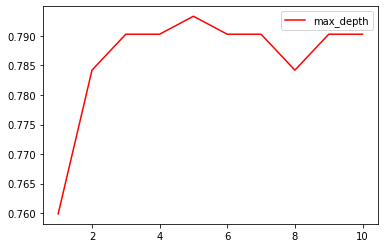

In [14]:
import matplotlib.pyplot as plt
test = list()
for i in range(10):
    tree = DecisionTreeClassifier(
        max_depth=i+1,
        criterion="entropy",
        random_state=30,
        splitter="random"
    )
    tree.fit(x_train, y_train)
    test.append(tree.score(x_test,y_test))
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()


## 决策树模型保存

In [15]:
export_graphviz(det, out_file="./tree.dot", feature_names=[
                '年龄', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', '女性', '男性'])
# 数据中的feature_names和参数中的feature_names一一对应而已，不用相同

查看模型：
- 工具:(能够将dot文件转换为pdf、png)
    ```
    安装graphviz
    ubuntu:sudo apt-get install graphviz       
    Mac:brew install graphviz 
    运行命令
    然后我们运行这个命令
    $ dot -Tpng tree.dot -o tree.png
    ```

# 随机森林示例

## 随即森林api使用

### 导包

In [16]:
from sklearn.ensemble import RandomForestClassifier  # 决策树

### 示例

In [17]:
rf = RandomForestClassifier(n_estimators=10, max_depth=8)

In [18]:
rf.fit(x_train, y_train.values.ravel())
# 不对y_train进行处理会报warning
# A column-vector y was passed when a 1d array was expected
# 此处进行扁平化处理
print("准确率:%s" % rf.score(x_test, y_test))

准确率:0.7963525835866262


## 随机森林+交叉验证网格搜索

### 导包

In [19]:
from sklearn.model_selection import GridSearchCV

### 示例

In [20]:
# 创建 随机森林 api 类
rf2 = RandomForestClassifier()
# 参数：
params = {
    "n_estimators": [120, 200, 300, 500, 800, 1200],
    "max_depth": [5, 8, 15, 25, 30]
}

# 获得模型
gc = GridSearchCV(rf, param_grid=params, cv=2)  # 交叉验证小点儿，为了节省时间

In [21]:
gc.fit(x_train, y_train.values.ravel())
# 同理，防止警告，使用ravel或flatten

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=10),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'n_estimators': [120, 200, 300, 500, 800, 1200]})

In [22]:
print("正确率%s" % gc.score(x_test, y_test))

正确率0.7993920972644377


In [23]:
print(gc.best_params_)

{'max_depth': 5, 'n_estimators': 120}
